In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [303]:
n=11
ciudades=[i for i in range(n)]
arcos=[(i,j) for i in ciudades for j in ciudades if i!=j]
np.random.seed(0)
coor_x=list(np.random.random(n)*100)
coor_y=list(np.random.random(n)*100)
distancias={(i,j):np.hypot(coor_x[i]-coor_x[j],coor_y[i]-coor_y[j]) for i,j in arcos}

In [304]:
m=Model("TSP Problem")

In [305]:
x=m.binary_var_dict(arcos,name="x")
d=m.continuous_var_dict(ciudades,name="d")

In [306]:
obj=m.sum(x[i,j]*distancias[i,j] for i,j in arcos)
m.minimize(obj)

In [307]:
m.add_constraints(m.sum(x[i,j] for i in ciudades if i!=j)==1 for j in ciudades)
m.add_constraints(m.sum(x[i,j] for j in ciudades if i!=j)==1 for i in ciudades)
m.add_indicator_constraints(m.indicator_constraint(x[i,j],d[i]+1==d[j]) for i,j in arcos if j!=0)

[docplex.mp.constr.IndicatorConstraint[](x_0_1,d_0+1 == d_1,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_2,d_0+1 == d_2,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_3,d_0+1 == d_3,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_4,d_0+1 == d_4,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_5,d_0+1 == d_5,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_6,d_0+1 == d_6,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_7,d_0+1 == d_7,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_8,d_0+1 == d_8,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_9,d_0+1 == d_9,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_0_10,d_0+1 == d_10,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_1_2,d_1+1 == d_2,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_1_3,d_1+1 == d_3,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_1_4,d_1+1 == d_4,true=1),
 docplex.mp.constr.IndicatorConstraint[](x_1_5,d_1+1 == d_5,true=1),
 docplex.mp.constr.IndicatorCons

In [308]:
print(m.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP Problem

Minimize
 obj: 17.091992868440 x_0_1 + 40.035339663450 x_0_2 + 45.787573044121 x_0_3
      + 45.915309472290 x_0_4 + 51.785755669188 x_0_5 + 32.345033425414 x_0_6
      + 42.397249554013 x_0_7 + 53.708553253195 x_0_8 + 47.916495091297 x_0_9
      + 36.338471479214 x_0_10 + 17.091992868440 x_1_0 + 37.481074051344 x_1_2
      + 52.537762423509 x_1_3 + 56.238055835487 x_1_4 + 55.219139590738 x_1_5
      + 38.348798894552 x_1_6 + 27.446113070410 x_1_7 + 39.105428175731 x_1_8
      + 52.785174444200 x_1_9 + 24.345716560327 x_1_10 + 40.035339663450 x_2_0
      + 37.481074051344 x_2_1 + 85.651847721009 x_2_3 + 85.738402139491 x_2_4
      + 90.640499749428 x_2_5 + 18.954643075006 x_2_6 + 32.444580988961 x_2_7
      + 36.515476337461 x_2_8 + 22.563993031928 x_2_9 + 22.736115826147 x_2_10
      + 45.787573044121 x_3_0 + 52.537762423509 x_3_1 + 85.651847721009 x_3_2
      + 12.229191889256 x_3_4 + 11.30736

In [309]:
sol=m.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.02 sec. (0.31 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Tried aggregator 1 time.
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.01 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0      178.5037    10                    178.503

In [310]:
m.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [311]:
sol.display()

solution for: TSP Problem
objective: 275.595
x_0_4 = 1
x_1_7 = 1
x_2_9 = 1
x_3_5 = 1
x_4_3 = 1
x_5_1 = 1
x_6_0 = 1
x_7_8 = 1
x_8_10 = 1
x_9_6 = 1
x_10_2 = 1
d_1 = 4.000
d_2 = 8.000
d_3 = 2.000
d_4 = 1.000
d_5 = 3.000
d_6 = 10.000
d_7 = 5.000
d_8 = 6.000
d_9 = 9.000
d_10 = 7.000


In [312]:
arcos_activos=[(k) for k in arcos if x[k].solution_value>0.99]
print(arcos_activos)

[(0, 4), (1, 7), (2, 9), (3, 5), (4, 3), (5, 1), (6, 0), (7, 8), (8, 10), (9, 6), (10, 2)]


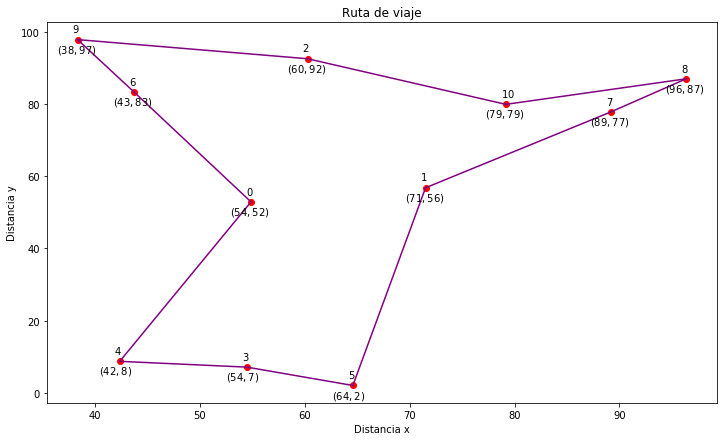

275.5945458689681


In [314]:
#Gráfico
plt.figure(figsize=(12,7))
plt.scatter(coor_x,coor_y, color="red")
for i in range(n):
    plt.annotate("($%d,%d$)"%(coor_x[i],coor_y[i]),(coor_x[i]-2,coor_y[i]-3.5),color="black")
for i in range(n):
    plt.annotate("$%d$"%(ciudades[i]),(coor_x[i]-0.5,coor_y[i]+2),color="black")
for i,j in arcos_activos:
    plt.plot([coor_x[i],coor_x[j]],[coor_y[i],coor_y[j]], color="purple") #Graficación de arcos activos
    
plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("Ruta de viaje")
plt.show()
print(obj.solution_value)